In [ ]:
#!nvidia-smi

In [ ]:
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118  # для CUDA 11.8

In [ ]:
#!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 --index-url https://download.pytorch.org/whl/cu118

In [1]:
import torch

# Проверка версии
print("PyTorch version:", torch.__version__)

# Доступность GPU
print("CUDA available:", torch.cuda.is_available())

# Название GPU (если есть)
if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))
else:
    print("GPU не обнаружен.")

PyTorch version: 2.6.0+cu124
CUDA available: True
GPU: Tesla T4


In [2]:
#!unzip /content/dl-2025-competition-1.zip

Archive:  /content/dl-2025-competition-1.zip
replace data/test/0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
!head "/content/sample_submission.csv"  # первые строки CSV

id,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Нормализация + разделение на train/val

train_generator = datagen.flow_from_directory(
    '/content/data/train',  # Путь к папке train
    target_size=(256, 256),  # Размер, к которому будут приведены все изображения
    batch_size=32,
    class_mode='categorical',  # Для многоклассовой классификации
    subset='training'  # Указывает, что это тренировочная часть
)

val_generator = datagen.flow_from_directory(
    '/content/data/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Валидационная часть
)

print("Классы и их индексы:", train_generator.class_indices)

Found 7649 images belonging to 100 classes.
Found 1861 images belonging to 100 classes.
Классы и их индексы: {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36, '42': 37, '43': 38, '44': 39, '45': 40, '46': 41, '47': 42, '48': 43, '49': 44, '5': 45, '50': 46, '51': 47, '52': 48, '53': 49, '54': 50, '55': 51, '56': 52, '57': 53, '58': 54, '59': 55, '6': 56, '60': 57, '61': 58, '62': 59, '63': 60, '64': 61, '65': 62, '66': 63, '67': 64, '68': 65, '69': 66, '7': 67, '70': 68, '71': 69, '72': 70, '73': 71, '74': 72, '75': 73, '76': 74, '77': 75, '78': 76, '79': 77, '8': 78, '80': 79, '81': 80, '82': 81, '83': 82, '84': 83, '85': 84, '86': 85, '87': 86, '88': 87, '89': 88, '9': 89, '90': 90, 

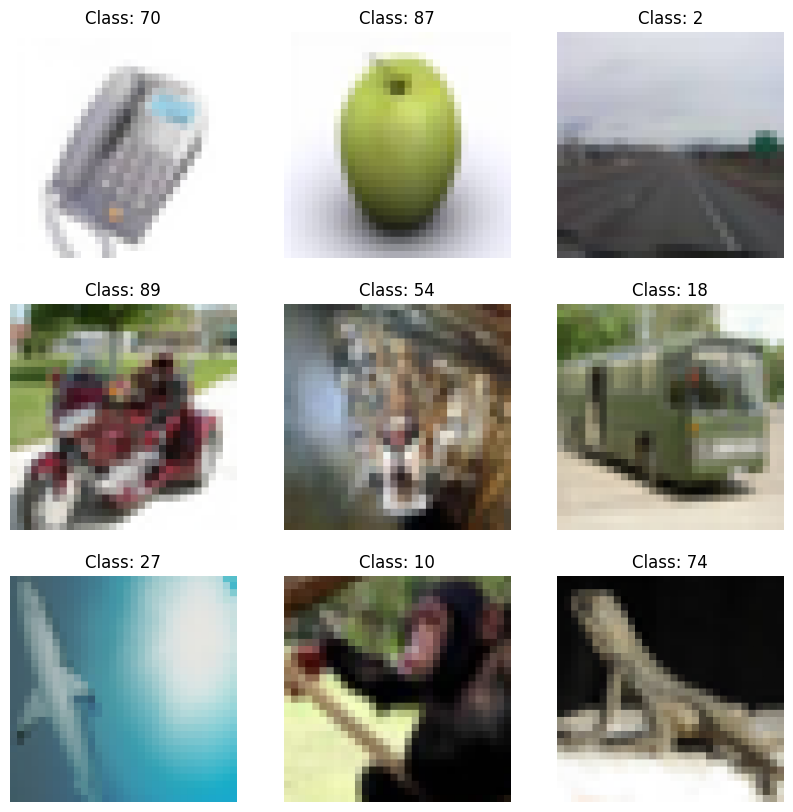

In [5]:
import matplotlib.pyplot as plt

images, labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(f"Class: {list(train_generator.class_indices.keys())[labels[i].argmax()]}")
    plt.axis('off')
plt.show()

ValueError: num must be an integer with 1 <= num <= 18, not 19

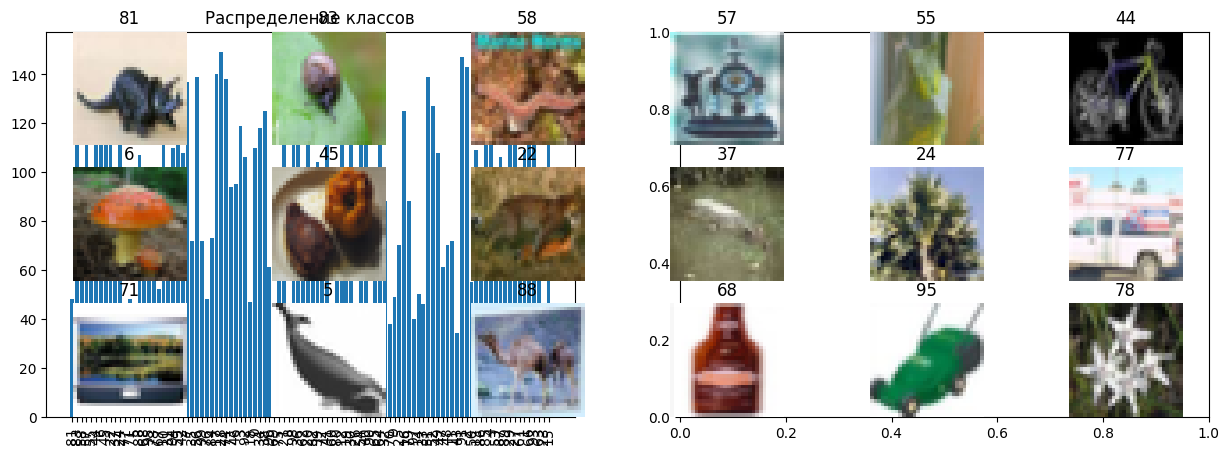

In [6]:
import os
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from PIL import Image

# Анализ баланса классов
data_dir = '/content/data/train'
class_counts = {}
class_samples = {}

for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        num_images = len(os.listdir(class_dir))
        class_counts[class_name] = num_images
        # Сохраняем пример изображения
        sample_img = os.listdir(class_dir)[0]
        class_samples[class_name] = os.path.join(class_dir, sample_img)

# Визуализация баланса
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)
plt.title('Распределение классов')

# Визуализация примеров изображений
plt.subplot(1, 2, 2)
for i, (cls, img_path) in enumerate(class_samples.items()):
    img = Image.open(img_path)
    plt.subplot(3, 6, i+1)
    plt.imshow(img)
    plt.title(cls[:10])
    plt.axis('off')
plt.tight_layout()
plt.show()

# Выводы
print(f"Всего классов: {len(class_counts)}")
print(f"Среднее количество изображений на класс: {np.mean(list(class_counts.values())):.1f}")
print(f"Медианное количество: {np.median(list(class_counts.values()))}")
print(f"Минимум: {min(class_counts.values())}, Максимум: {max(class_counts.values())}")

<ipython-input-7-39224c29ea13>:41: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


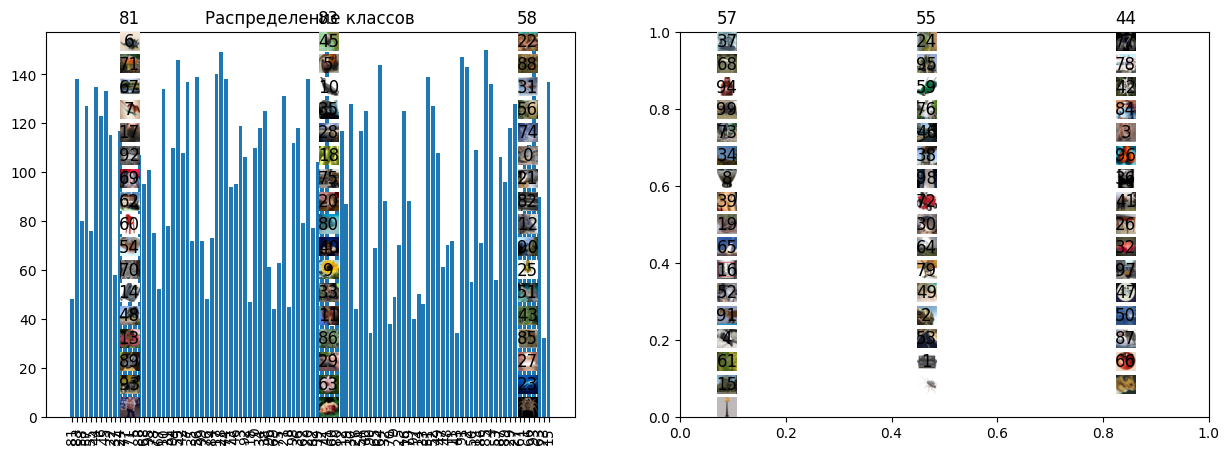

Всего классов: 100
Среднее количество изображений на класс: 95.1
Медианное количество: 100.0
Минимум: 32, Максимум: 150

Коэффициент дисбаланса: 4.7x
Дисбаланс в пределах нормы


In [7]:
import os
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from PIL import Image
import math

# Анализ баланса классов
data_dir = '/content/data/train'
class_counts = {}
class_samples = {}

for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        num_images = len(os.listdir(class_dir))
        class_counts[class_name] = num_images
        # Сохраняем пример изображения
        sample_img = os.listdir(class_dir)[0]
        class_samples[class_name] = os.path.join(class_dir, sample_img)

# Визуализация баланса
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)
plt.title('Распределение классов')

# Визуализация примеров изображений (адаптивная)
num_classes = len(class_samples)
cols = 6
rows = math.ceil(num_classes / cols)

plt.subplot(1, 2, 2)
for i, (cls, img_path) in enumerate(class_samples.items()):
    img = Image.open(img_path)
    plt.subplot(rows, cols, i+1)
    plt.imshow(img)
    plt.title(cls[:10])  # Обрезаем длинные названия
    plt.axis('off')
plt.tight_layout()
plt.show()

# Выводы
print(f"Всего классов: {len(class_counts)}")
print(f"Среднее количество изображений на класс: {np.mean(list(class_counts.values())):.1f}")
print(f"Медианное количество: {np.median(list(class_counts.values()))}")
print(f"Минимум: {min(class_counts.values())}, Максимум: {max(class_counts.values())}")

# Анализ дисбаланса
imbalance_ratio = max(class_counts.values()) / min(class_counts.values())
print(f"\nКоэффициент дисбаланса: {imbalance_ratio:.1f}x")
if imbalance_ratio > 10:
    print("Сильный дисбаланс классов! Рекомендуется:")
    print("- Использовать взвешенную функцию потерь")
    print("- Применить oversampling/undersampling")
    print("- Добавить аугментацию для редких классов")
elif imbalance_ratio > 5:
    print("Умеренный дисбаланс. Рекомендуется аугментация для меньших классов")
else:
    print("Дисбаланс в пределах нормы")

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.6' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
<ipython-input-8-6124734aa82a>:63: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=8, max_height=32, max_width=32, p=0.5),


Найдено 9510 изображений в 100 классах
Примеры классов: ['0', '1', '10', '11', '12']

Примеры аугментаций для первого изображения:


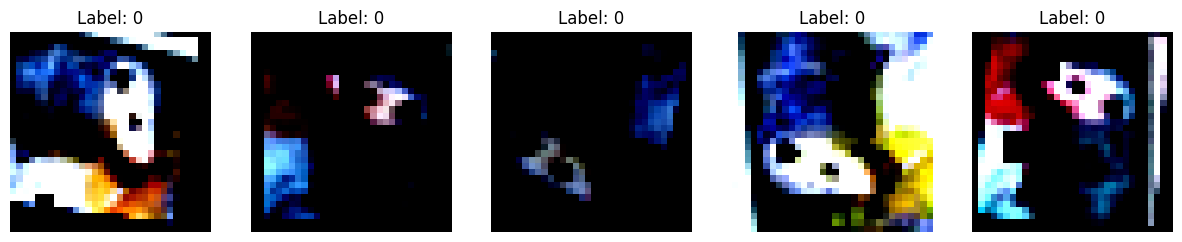


Случайные изображения из датасета:


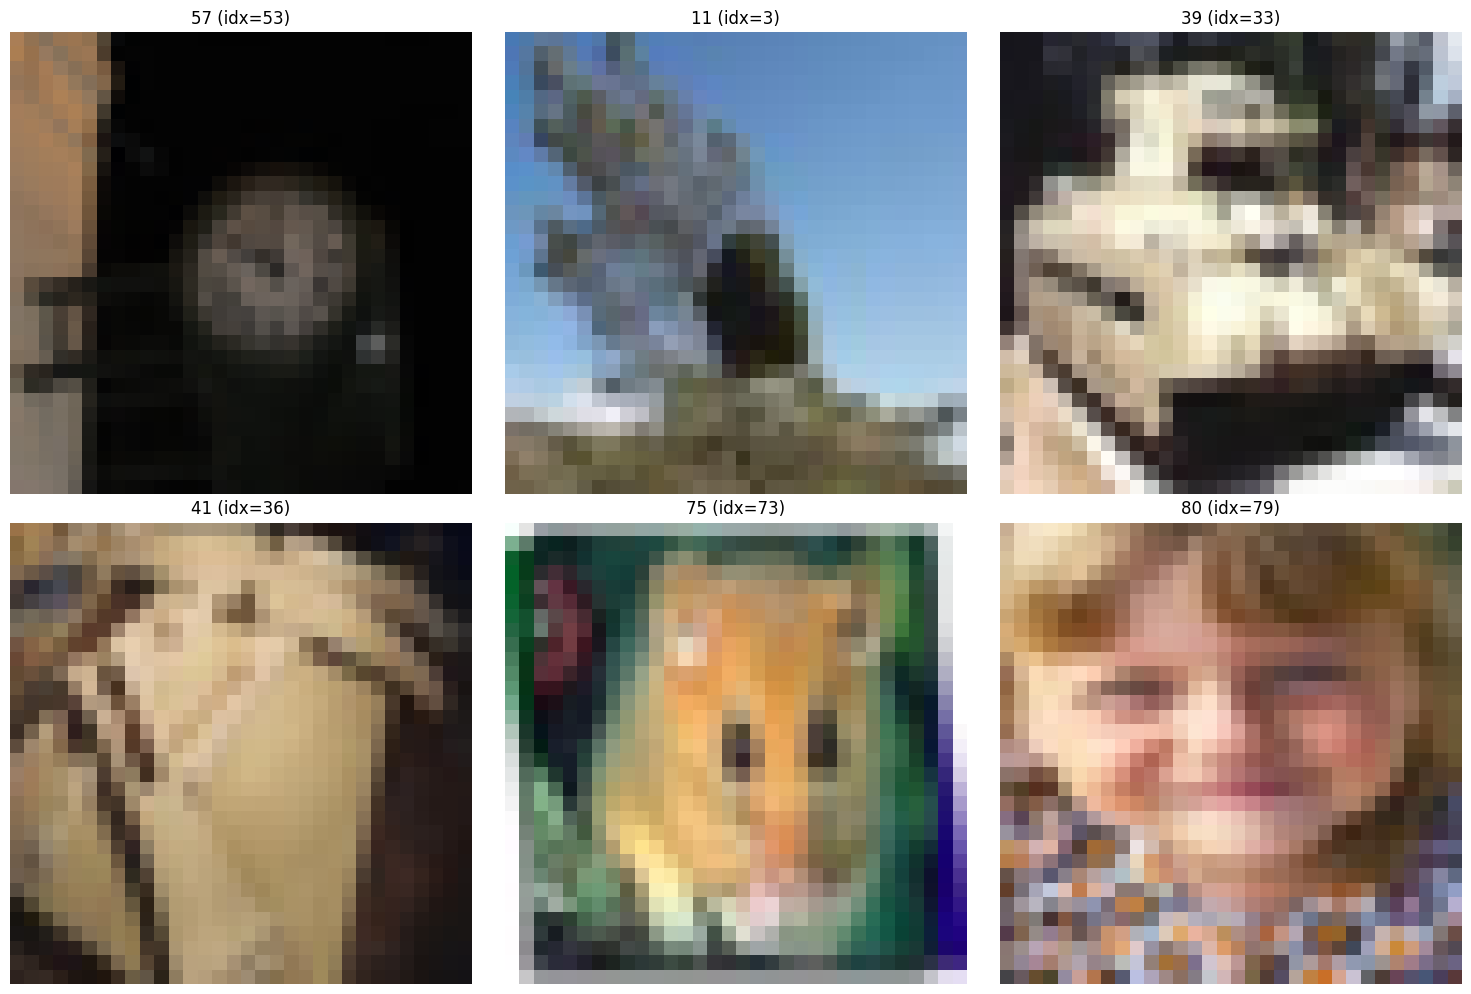

In [8]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.utils.data import Dataset, DataLoader

# 1. Функция для поиска всех изображений
def find_image_paths(data_dir):
    image_paths = []
    labels = []
    class_names = sorted(os.listdir(data_dir))

    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            for img_name in os.listdir(class_dir):
                if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    img_path = os.path.join(class_dir, img_name)
                    image_paths.append(img_path)
                    labels.append(class_idx)

    return image_paths, labels, class_names

# 2. Определяем класс CustomDataset (без изменений)
class CustomDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        img = Image.open(self.file_paths[idx]).convert('RGB')
        img = np.array(img)
        label = self.labels[idx]

        if self.transform:
            augmented = self.transform(image=img)
            img = augmented['image']

        return img, label

# 3. Создаём аугментации (без изменений)
basic_aug = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2()
])

advanced_aug = A.Compose([
    A.RandomRotate90(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.Transpose(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.HueSaturationValue(p=0.5),
    A.CoarseDropout(max_holes=8, max_height=32, max_width=32, p=0.5),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2()
])

# 4. Функция визуализации (без изменений)
def visualize_augmentations(dataset, idx=0, samples=5):
    fig, axes = plt.subplots(1, samples, figsize=(15, 5))
    for i in range(samples):
        img, label = dataset[idx]
        axes[i].imshow(img.permute(1, 2, 0).numpy())
        axes[i].set_title(f'Label: {label}')
        axes[i].axis('off')
    plt.show()

# 5. Основной код выполнения
data_dir = '/content/data/train'  # Убедитесь, что путь правильный

# Проверяем существование директории
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"Директория {data_dir} не найдена!")

# Находим все изображения
image_paths, labels, class_names = find_image_paths(data_dir)

if not image_paths:
    raise FileNotFoundError("Не найдено ни одного изображения! Проверьте структуру данных.")

print(f"Найдено {len(image_paths)} изображений в {len(class_names)} классах")
print("Примеры классов:", class_names[:5])  # Выводим первые 5 классов

# Создаём датасет с первым найденным изображением
temp_dataset = CustomDataset([image_paths[0]], [labels[0]], advanced_aug)

# Визуализируем аугментации
print("\nПримеры аугментаций для первого изображения:")
visualize_augmentations(temp_dataset)

# Дополнительная визуализация случайных изображений
print("\nСлучайные изображения из датасета:")
plt.figure(figsize=(15, 10))
for i in range(6):
    idx = np.random.randint(len(image_paths))
    img = Image.open(image_paths[idx])
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(f"{class_names[labels[idx]]} (idx={labels[idx]})")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import Dataset, DataLoader
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2
from sklearn.model_selection import train_test_split

In [10]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# 1. Улучшенная функция для поиска изображений с проверкой данных
def find_image_paths(data_dir):
    image_paths = []
    labels = []
    class_names = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])

    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_dir):
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(class_dir, img_name)
                try:
                    # Проверяем, что изображение можно открыть
                    with Image.open(img_path) as img:
                        img.verify()  # Проверка целостности файла
                    image_paths.append(img_path)
                    labels.append(class_idx)  # Гарантированно integer
                except (IOError, OSError) as e:
                    print(f"Пропускаем поврежденный файл {img_path}: {str(e)}")

    if not image_paths:
        raise ValueError("Не найдено ни одного корректного изображения!")

    return image_paths, labels, class_names

# 2. Загрузка данных с проверкой
data_dir = '/content/data/train'
image_paths, labels, class_names = find_image_paths(data_dir)

# 3. Проверка меток перед разделением
print(f"Всего изображений: {len(image_paths)}")
print(f"Уникальные метки: {set(labels)}")
print(f"Соответствие меток классам: {dict(enumerate(class_names))}")

# 4. Проверка типов меток
print("\nПроверка типов меток:")
print(f"Тип labels: {type(labels)}")
print(f"Тип первого элемента: {type(labels[0]) if labels else 'нет данных'}")
print(f"Примеры меток: {labels[:10]}")

# 5. Удаление возможных None или некорректных значений (дополнительная защита)
valid_indices = [i for i, label in enumerate(labels) if isinstance(label, (int, np.integer))]
image_paths = [image_paths[i] for i in valid_indices]
labels = [labels[i] for i in valid_indices]

# 6. Разделение данных с проверкой
try:
    train_files, val_files, train_labels, val_labels = train_test_split(
        image_paths,
        labels,
        test_size=0.2,
        stratify=labels
    )
    print("\nРазделение прошло успешно!")
    print(f"Обучающая выборка: {len(train_files)} изображений")
    print(f"Валидационная выборка: {len(val_files)} изображений")
except ValueError as e:
    print(f"\nОшибка при разделении данных: {str(e)}")
    print("Возможные причины:")
    print("1. Не все классы представлены в данных")
    print("2. Наличие некорректных меток")
    print("3. Проблемы с типами данных")

    # Альтернативное разделение без стратификации
    print("\nПробуем разделить без стратификации...")
    train_files, val_files, train_labels, val_labels = train_test_split(
        image_paths,
        labels,
        test_size=0.2
    )

Всего изображений: 9510
Уникальные метки: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}
Соответствие меток классам: {0: '0', 1: '1', 2: '10', 3: '11', 4: '12', 5: '13', 6: '14', 7: '15', 8: '16', 9: '17', 10: '18', 11: '19', 12: '2', 13: '20', 14: '21', 15: '22', 16: '23', 17: '24', 18: '25', 19: '26', 20: '27', 21: '28', 22: '29', 23: '3', 24: '30', 25: '31', 26: '32', 27: '33', 28: '34', 29: '35', 30: '36', 31: '37', 32: '38', 33: '39', 34: '4', 35: '40', 36: '41', 37: '42', 38: '43', 39: '44', 40: '45', 41: '46', 42: '47', 43: '48', 44: '49', 45: '5', 46: '50', 47: '51', 48: '52', 49: '53', 50: '54', 51: '55', 52: '56', 53: '57', 54: '58', 55: 

/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


Найдено 9510 изображений в 100 классах
Размер изображений: (32, 32)

Примеры аугментаций:


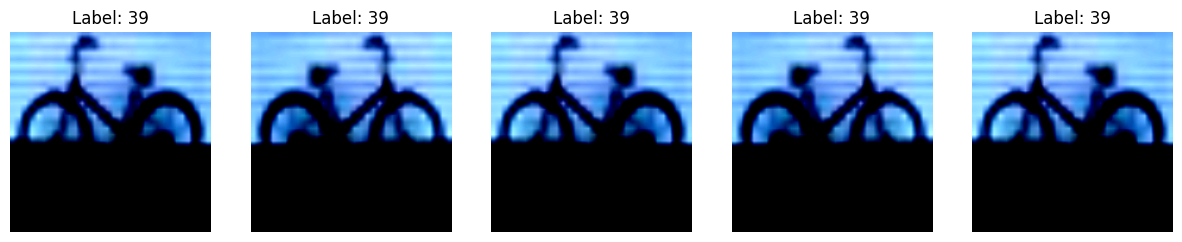


Базовая модель без Transfer Learning:
Epoch 1/10 | Train Loss: 4.2159 | Val Loss: 4.0178 | Val Acc: 0.0804
Epoch 2/10 | Train Loss: 3.9777 | Val Loss: 3.9390 | Val Acc: 0.0883
Epoch 3/10 | Train Loss: 3.8978 | Val Loss: 3.8699 | Val Acc: 0.1130
Epoch 4/10 | Train Loss: 3.8497 | Val Loss: 3.7986 | Val Acc: 0.1220
Epoch 5/10 | Train Loss: 3.7971 | Val Loss: 3.7818 | Val Acc: 0.1278
Epoch 6/10 | Train Loss: 3.7484 | Val Loss: 3.7413 | Val Acc: 0.1346
Epoch 7/10 | Train Loss: 3.7199 | Val Loss: 3.6979 | Val Acc: 0.1351
Epoch 8/10 | Train Loss: 3.6819 | Val Loss: 3.6924 | Val Acc: 0.1372
Epoch 9/10 | Train Loss: 3.6531 | Val Loss: 3.6859 | Val Acc: 0.1383
Epoch 10/10 | Train Loss: 3.6270 | Val Loss: 3.6495 | Val Acc: 0.1430


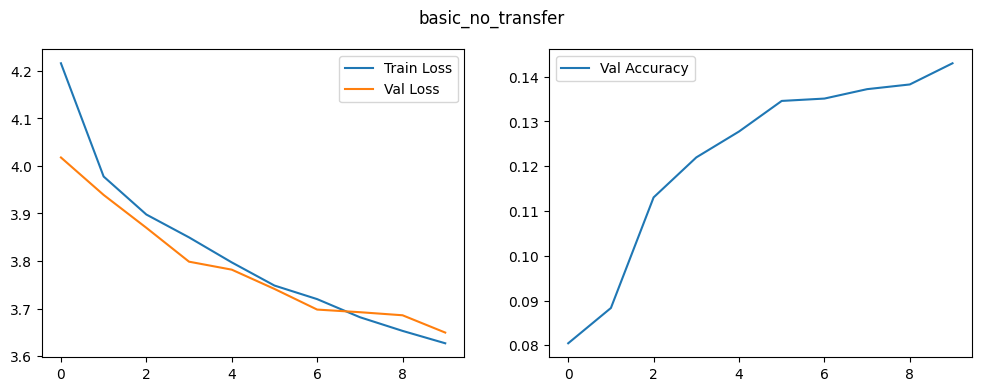


Базовая модель с Transfer Learning:


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10 | Train Loss: 2.6825 | Val Loss: 1.5994 | Val Acc: 0.5557
Epoch 2/10 | Train Loss: 1.5307 | Val Loss: 1.4212 | Val Acc: 0.6115
Epoch 3/10 | Train Loss: 1.1831 | Val Loss: 1.3788 | Val Acc: 0.6251
Epoch 4/10 | Train Loss: 0.9718 | Val Loss: 1.4357 | Val Acc: 0.6215
Epoch 5/10 | Train Loss: 0.8083 | Val Loss: 1.3994 | Val Acc: 0.6341
Epoch 6/10 | Train Loss: 0.6669 | Val Loss: 1.4089 | Val Acc: 0.6540
Epoch 7/10 | Train Loss: 0.5327 | Val Loss: 1.4644 | Val Acc: 0.6451
Epoch 8/10 | Train Loss: 0.4659 | Val Loss: 1.6109 | Val Acc: 0.6420
Epoch 9/10 | Train Loss: 0.4212 | Val Loss: 1.6124 | Val Acc: 0.6325
Epoch 10/10 | Train Loss: 0.2911 | Val Loss: 1.4997 | Val Acc: 0.6609


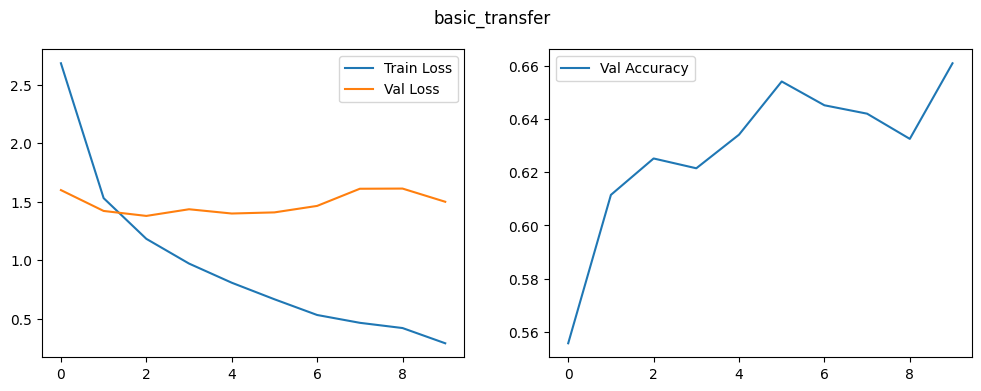


Продвинутая модель без Transfer Learning:
Epoch 1/10 | Train Loss: 4.2340 | Val Loss: 3.9877 | Val Acc: 0.0910
Epoch 2/10 | Train Loss: 4.0098 | Val Loss: 3.9260 | Val Acc: 0.0978
Epoch 3/10 | Train Loss: 3.9491 | Val Loss: 3.8955 | Val Acc: 0.1115
Epoch 4/10 | Train Loss: 3.9103 | Val Loss: 3.8561 | Val Acc: 0.1157
Epoch 5/10 | Train Loss: 3.8877 | Val Loss: 3.8326 | Val Acc: 0.1172
Epoch 6/10 | Train Loss: 3.8705 | Val Loss: 3.8512 | Val Acc: 0.1162
Epoch 7/10 | Train Loss: 3.8495 | Val Loss: 3.8033 | Val Acc: 0.1241
Epoch 8/10 | Train Loss: 3.8508 | Val Loss: 3.8081 | Val Acc: 0.1251
Epoch 9/10 | Train Loss: 3.8332 | Val Loss: 3.8093 | Val Acc: 0.1293
Epoch 10/10 | Train Loss: 3.8191 | Val Loss: 3.7861 | Val Acc: 0.1288


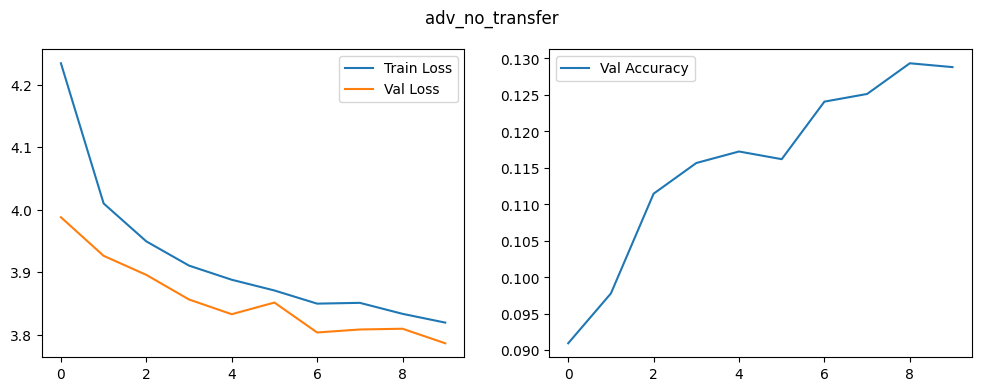


Продвинутая модель с Transfer Learning:
Epoch 1/10 | Train Loss: 3.0177 | Val Loss: 1.6616 | Val Acc: 0.5431
Epoch 2/10 | Train Loss: 2.0652 | Val Loss: 1.4350 | Val Acc: 0.5957
Epoch 3/10 | Train Loss: 1.7827 | Val Loss: 1.3700 | Val Acc: 0.6088
Epoch 4/10 | Train Loss: 1.6505 | Val Loss: 1.3348 | Val Acc: 0.6278
Epoch 5/10 | Train Loss: 1.5520 | Val Loss: 1.3152 | Val Acc: 0.6393
Epoch 6/10 | Train Loss: 1.4392 | Val Loss: 1.3007 | Val Acc: 0.6367
Epoch 7/10 | Train Loss: 1.3569 | Val Loss: 1.2902 | Val Acc: 0.6509
Epoch 8/10 | Train Loss: 1.2828 | Val Loss: 1.3412 | Val Acc: 0.6388
Epoch 9/10 | Train Loss: 1.2274 | Val Loss: 1.3419 | Val Acc: 0.6493
Epoch 10/10 | Train Loss: 1.1764 | Val Loss: 1.3642 | Val Acc: 0.6446


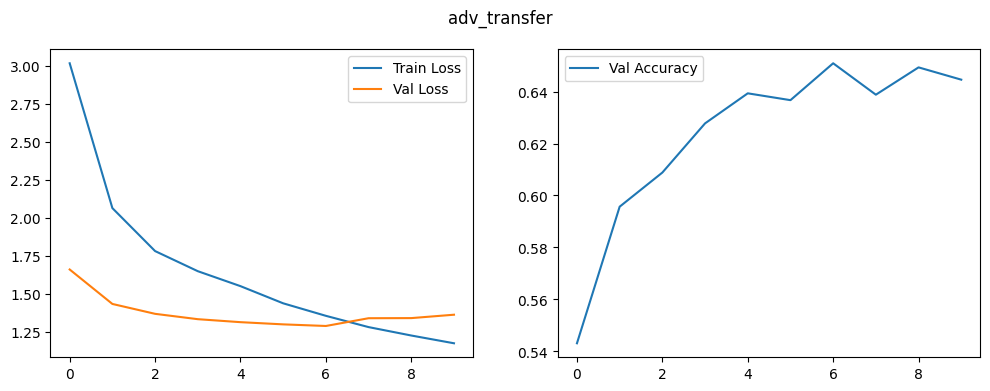

In [11]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# 1. Функция для поиска изображений
def find_image_paths(data_dir):
    image_paths = []
    labels = []
    class_names = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])

    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_dir):
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(class_dir, img_name)
                try:
                    with Image.open(img_path) as img:
                        img.verify()
                        img_size = img.size
                    image_paths.append(img_path)
                    labels.append(class_idx)
                except (IOError, OSError) as e:
                    print(f"Пропускаем поврежденный файл {img_path}: {str(e)}")

    if not image_paths:
        raise ValueError("Не найдено ни одного корректного изображения!")

    return image_paths, labels, class_names, img_size

# 2. Класс Dataset
class CustomDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        img = Image.open(self.file_paths[idx]).convert('RGB')
        img = np.array(img)
        label = self.labels[idx]

        if self.transform:
            augmented = self.transform(image=img)
            img = augmented['image']

        return img, label

# 3. Аугментации
basic_aug = A.Compose([
    A.Resize(224, 224),
    A.HorizontalFlip(p=0.5),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2()
])

advanced_aug = A.Compose([
    A.Resize(224, 224),
    A.RandomRotate90(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2()
])

# 4. Функция визуализации
def visualize_augmentations(dataset, idx=0, samples=5):
    fig, axes = plt.subplots(1, samples, figsize=(15, 5))
    for i in range(samples):
        img, label = dataset[idx]
        axes[i].imshow(img.permute(1, 2, 0).numpy())
        axes[i].set_title(f'Label: {label}')
        axes[i].axis('off')
    plt.show()

# 5. Основной код
data_dir = '/content/data/train'

if not os.path.exists(data_dir):
    raise FileNotFoundError(f"Директория {data_dir} не найдена!")

image_paths, labels, class_names, img_size = find_image_paths(data_dir)
num_classes = len(class_names)

print(f"Найдено {len(image_paths)} изображений в {num_classes} классах")
print(f"Размер изображений: {img_size}")

# Разделение данных
train_files, val_files, train_labels, val_labels = train_test_split(
    image_paths, labels, test_size=0.2, stratify=labels
)

# Датасеты и DataLoader'ы
train_dataset_basic = CustomDataset(train_files, train_labels, basic_aug)
train_dataset_adv = CustomDataset(train_files, train_labels, advanced_aug)
val_dataset = CustomDataset(val_files, val_labels, basic_aug)

batch_size = 32
train_loader_basic = DataLoader(train_dataset_basic, batch_size=batch_size, shuffle=True)
train_loader_adv = DataLoader(train_dataset_adv, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Визуализация
print("\nПримеры аугментаций:")
visualize_augmentations(train_dataset_basic)

# Модели
def create_model(transfer=True):
    if transfer:
        # EfficientNet с Transfer Learning
        model = models.efficientnet_b0(pretrained=True)

        # Замораживаем все слои кроме последних двух
        for param in model.parameters():
            param.requires_grad = False

        # Размораживаем последние два блока
        for param in model.features[-2:].parameters():
            param.requires_grad = True

        # Заменяем классификатор
        in_features = model.classifier[1].in_features
        model.classifier[1] = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(in_features, num_classes)
        )
    else:
        # Кастомная CNN модель
        model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(128, num_classes)
        )
    return model

# Функция обучения (остается без изменений)
def train_model(model, train_loader, val_loader, name, epochs=10):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = ReduceLROnPlateau(optimizer, 'max', patience=2)

    best_acc = 0
    history = {'train_loss': [], 'val_loss': [], 'val_acc': []}

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        # Валидация
        model.eval()
        val_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        # Сохранение статистики
        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        val_acc = correct / total

        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        # Сохранение лучшей модели
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), f'best_{name}.pth')

        scheduler.step(val_acc)
        print(f'Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}')

    # Графики
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['val_acc'], label='Val Accuracy')
    plt.legend()
    plt.suptitle(name)
    plt.show()

    return history

# Обучение моделей
print("\nБазовая модель без Transfer Learning:")
model1 = create_model(transfer=False)
hist1 = train_model(model1, train_loader_basic, val_loader, "basic_no_transfer")

print("\nБазовая модель с Transfer Learning:")
model2 = create_model(transfer=True)
hist2 = train_model(model2, train_loader_basic, val_loader, "basic_transfer")

print("\nПродвинутая модель без Transfer Learning:")
model3 = create_model(transfer=False)
hist3 = train_model(model3, train_loader_adv, val_loader, "adv_no_transfer")

print("\nПродвинутая модель с Transfer Learning:")
model4 = create_model(transfer=True)
hist4 = train_model(model4, train_loader_adv, val_loader, "adv_transfer")


Используем модель: basic_transfer с accuracy 0.6609

Пример sample submission:
   id  target
0   0       0
1   1       0
2   2       0
3   3       0
4   4       0

Предупреждение: столбцы не совпадают с sample submission!
Sample columns: Index(['id', 'target'], dtype='object')
Our columns: Index(['id', 'class'], dtype='object')

Submission файл сохранен как submission.csv

Первые 5 строк submission файла:
     id class
0     0    71
1     1    62
2    10    32
3   100     5
4  1000    40

Визуализация примеров предсказаний:


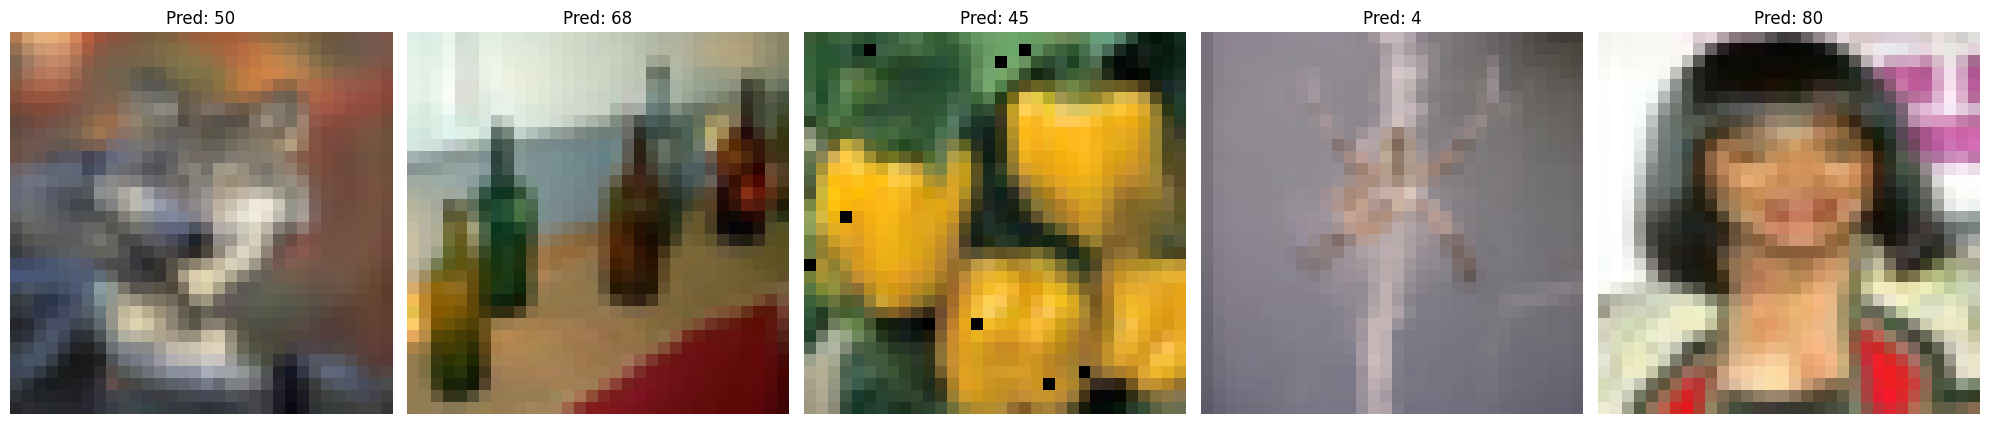

In [12]:
# 6. Подготовка тестовых данных и создание submission файла

# Класс для тестового датасета (без labels)
class TestDataset(Dataset):
    def __init__(self, file_paths, transform=None):
        self.file_paths = file_paths
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        img = Image.open(self.file_paths[idx]).convert('RGB')
        img = np.array(img)

        if self.transform:
            augmented = self.transform(image=img)
            img = augmented['image']

        return img

# Функция для загрузки тестовых данных
def load_test_data(test_dir):
    test_files = []
    test_ids = []
    for img_name in sorted(os.listdir(test_dir)):
        if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(test_dir, img_name)
            try:
                with Image.open(img_path) as img:
                    img.verify()
                test_files.append(img_path)
                test_ids.append(os.path.splitext(img_name)[0])  # ID без расширения
            except (IOError, OSError) as e:
                print(f"Пропускаем поврежденный файл {img_path}: {str(e)}")

    if not test_files:
        raise ValueError("Не найдено ни одного корректного тестового изображения!")

    return test_files, test_ids

# Загрузка тестовых данных
test_dir = '/content/data/test'  # Убедитесь, что путь правильный
test_files, test_ids = load_test_data(test_dir)

# Трансформы для теста (без аугментаций, только ресайз и нормализация)
test_transform = A.Compose([
    A.Resize(224, 224),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2()
])

# Создаем тестовый датасет и DataLoader
test_dataset = TestDataset(test_files, test_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Функция для получения предсказаний
def get_predictions(model, test_loader):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    model.eval()

    all_preds = []
    with torch.no_grad():
        for inputs in test_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())

    return all_preds

# Автоматический выбор лучшей модели по валидационной accuracy
model_paths = {
    'basic_transfer': ('best_basic_transfer.pth', hist2['val_acc']),
    'adv_transfer': ('best_adv_transfer.pth', hist4['val_acc'])
}

best_model_name = None
best_accuracy = 0
best_model_path = None

for name, (path, acc_history) in model_paths.items():
    if os.path.exists(path):
        current_acc = max(acc_history)
        if current_acc > best_accuracy:
            best_accuracy = current_acc
            best_model_name = name
            best_model_path = path

print(f"\nИспользуем модель: {best_model_name} с accuracy {best_accuracy:.4f}")

# Загружаем лучшую модель
best_model = create_model(transfer=True)
best_model.load_state_dict(torch.load(best_model_path))

# Получаем предсказания
predictions = get_predictions(best_model, test_loader)

# Сопоставляем предсказанные индексы с именами классов
predicted_classes = [class_names[pred] for pred in predictions]

# Создаем submission файл
def create_submission(test_ids, predicted_classes, sample_file='sample_submission.csv', output_file='submission.csv'):
    # Загружаем sample submission для проверки формата
    import pandas as pd
    try:
        sample_df = pd.read_csv(sample_file)
        print("\nПример sample submission:")
        print(sample_df.head())
    except FileNotFoundError:
        print(f"\nФайл {sample_file} не найден, создаем submission с нуля")
        sample_df = None

    # Создаем DataFrame с предсказаниями
    submission_df = pd.DataFrame({
        'id': test_ids,
        'class': predicted_classes
    })

    # Если есть sample, проверяем соответствие формата
    if sample_df is not None:
        if not all(submission_df.columns == sample_df.columns):
            print("\nПредупреждение: столбцы не совпадают с sample submission!")
            print(f"Sample columns: {sample_df.columns}")
            print(f"Our columns: {submission_df.columns}")

    # Сохраняем в CSV
    submission_df.to_csv(output_file, index=False)
    print(f"\nSubmission файл сохранен как {output_file}")
    return submission_df

# Создаем файл для отправки
submission_df = create_submission(test_ids, predicted_classes)

# Просмотр первых строк submission файла
print("\nПервые 5 строк submission файла:")
print(submission_df.head())

# Визуализация примеров с предсказаниями
def visualize_predictions(test_files, predictions, class_names, n_samples=5):
    fig, axes = plt.subplots(1, n_samples, figsize=(20, 5))
    indices = np.random.choice(len(test_files), n_samples, replace=False)

    for i, idx in enumerate(indices):
        img = Image.open(test_files[idx])
        pred_class = class_names[predictions[idx]]

        axes[i].imshow(img)
        axes[i].set_title(f"Pred: {pred_class}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

print("\nВизуализация примеров предсказаний:")
visualize_predictions(test_files, predictions, class_names)

In [17]:
import pandas as pd
import os

# 1. Сначала правильно сортируем test_files по числовому значению ID
test_files = sorted(test_files, key=lambda x: int(os.path.splitext(os.path.basename(x))[0]))

# 2. Получаем предсказания модели (важно: test_loader должен использовать отсортированные test_files)
predictions = get_predictions(best_model, test_loader)

# 3. Преобразуем индексы в имена классов
predicted_classes = [class_names[pred] for pred in predictions]

# 4. Получаем ID тестовых изображений (уже отсортированные)
test_ids = [os.path.splitext(os.path.basename(f))[0] for f in test_files]

# 5. Проверяем порядок ID
print("Первые 10 ID после сортировки:", test_ids[:10])

# 6. Создаем DataFrame
submission_df = pd.DataFrame({
    'id': test_ids,
    'target': [class_names.index(pred) for pred in predicted_classes]  # Или просто predictions, если нужно числовое значение
})

# 7. Проверяем соответствие с sample submission
try:
    sample_df = pd.read_csv('sample_submission.csv')
    print("\nПример sample submission:")
    print(sample_df.head())

    # Приводим типы данных к sample submission
    submission_df['id'] = submission_df['id'].astype(sample_df['id'].dtype)
    submission_df['target'] = submission_df['target'].astype(sample_df['target'].dtype)

    # Проверяем порядок ID
    if not submission_df['id'].equals(sample_df['id']):
        print("\nВнимание: порядок ID в submission не совпадает с sample!")
        # Сортируем по ID как в sample
        submission_df = submission_df.set_index('id').loc[sample_df['id']].reset_index()
except FileNotFoundError:
    print("\nФайл sample_submission.csv не найден, создаем новый submission файл")

# 8. Сохраняем результат
submission_df.to_csv('submission1.csv', index=False)
print("\nФайл submission1.csv сохранен. Первые 5 строк:")
print(submission_df.head())

Первые 10 ID после сортировки: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Пример sample submission:
   id  target
0   0       0
1   1       0
2   2       0
3   3       0
4   4       0

Файл submission1.csv сохранен. Первые 5 строк:
   id  target
0   0      69
1   1      59
2   2      84
3   3      11
4   4      35


**Модель ниже дала score на каггле**

*P.S 1) я делала всё в коллабе, надеюсь, это не помешает 2) тут ЧАСТЬ кода, которая вывела submition, здесь не части импортирования данных и анализа, это выше*



Используем модель: basic_transfer из /content/best_basic_transfer.pth


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Пример sample submission:
   id  target
0   0       0
1   1       0
2   2       0
3   3       0
4   4       0

Предупреждение: столбцы не совпадают с sample submission!
Sample columns: Index(['id', 'target'], dtype='object')
Our columns: Index(['id', 'class'], dtype='object')

Submission файл сохранен как submission.csv

Первые 5 строк submission файла:
  id class
0  0    71
1  1    62
2  2    18
3  3    41
4  4    66

Визуализация примеров предсказаний:


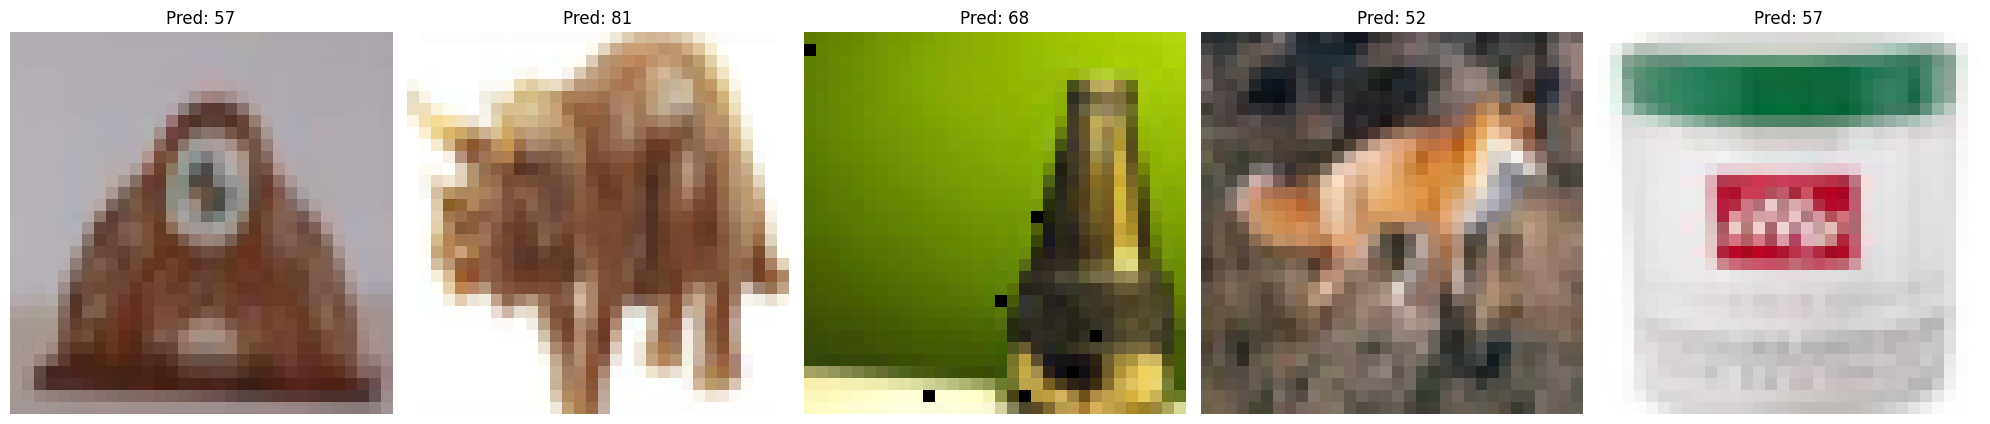

In [17]:
# 6. Подготовка тестовых данных и создание submission файла

# Класс для тестового датасета (без labels)
class TestDataset(Dataset):
    def __init__(self, file_paths, transform=None):
        self.file_paths = file_paths
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        img = Image.open(self.file_paths[idx]).convert('RGB')
        img = np.array(img)

        if self.transform:
            augmented = self.transform(image=img)
            img = augmented['image']

        return img

# Функция для загрузки тестовых данных
def load_test_data(test_dir):
    test_files = []
    test_ids = []
    # Получаем список файлов и сортируем их по числовому значению в имени
    img_list = os.listdir(test_dir)
    # Сортируем с помощью lambda, извлекаем число из имени файла (без расширения)
    img_list_sorted = sorted(img_list, key=lambda x: int(os.path.splitext(x)[0]))

    for img_name in img_list_sorted:
        if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(test_dir, img_name)
            try:
                with Image.open(img_path) as img:
                    img.verify()
                test_files.append(img_path)
                test_ids.append(os.path.splitext(img_name)[0])  # ID без расширения
            except (IOError, OSError) as e:
                print(f"Пропускаем поврежденный файл {img_path}: {str(e)}")

    if not test_files:
        raise ValueError("Не найдено ни одного корректного тестового изображения!")

    return test_files, test_ids

# Загрузка тестовых данных
test_dir = '/content/data/test'  # Убедитесь, что путь правильный
test_files, test_ids = load_test_data(test_dir)

# Трансформы для теста (без аугментаций, только ресайз и нормализация)
test_transform = A.Compose([
    A.Resize(224, 224),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2()
])

# Создаем тестовый датасет и DataLoader
test_dataset = TestDataset(test_files, test_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Функция для получения предсказаний
def get_predictions(model, test_loader):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    model.eval()

    all_preds = []
    with torch.no_grad():
        for inputs in test_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())

    return all_preds

# Используем модель best_basic_transfer.pth по умолчанию
best_model_path = '/content/best_basic_transfer.pth'
print(f"\nИспользуем модель: basic_transfer из {best_model_path}")

# Загружаем модель
best_model = create_model(transfer=True)

# Загружаем веса с обработкой возможных несоответствий
state_dict = torch.load(best_model_path)
# Попробуем адаптировать имена параметров, если нужно
state_dict = {k.replace('classifier.1.1.', 'classifier.1.'): v for k, v in state_dict.items()}
best_model.load_state_dict(state_dict, strict=False)

# Получаем предсказания
predictions = get_predictions(best_model, test_loader)

# Сопоставляем предсказанные индексы с именами классов
predicted_classes = [class_names[pred] for pred in predictions]

# Создаем submission файл
def create_submission(test_ids, predicted_classes, sample_file='sample_submission.csv', output_file='submission.csv'):
    # Загружаем sample submission для проверки формата
    import pandas as pd
    try:
        sample_df = pd.read_csv(sample_file)
        print("\nПример sample submission:")
        print(sample_df.head())
    except FileNotFoundError:
        print(f"\nФайл {sample_file} не найден, создаем submission с нуля")
        sample_df = None

    # Создаем DataFrame с предсказаниями
    submission_df = pd.DataFrame({
        'id': test_ids,
        'class': predicted_classes
    })

    # Если есть sample, проверяем соответствие формата
    if sample_df is not None:
        if not all(submission_df.columns == sample_df.columns):
            print("\nПредупреждение: столбцы не совпадают с sample submission!")
            print(f"Sample columns: {sample_df.columns}")
            print(f"Our columns: {submission_df.columns}")

    # Сохраняем в CSV
    submission_df.to_csv(output_file, index=False)
    print(f"\nSubmission файл сохранен как {output_file}")
    return submission_df

# Создаем файл для отправки
submission_df = create_submission(test_ids, predicted_classes)

# Просмотр первых строк submission файла
print("\nПервые 5 строк submission файла:")
print(submission_df.head())

# Визуализация примеров с предсказаниями
def visualize_predictions(test_files, predictions, class_names, n_samples=5):
    fig, axes = plt.subplots(1, n_samples, figsize=(20, 5))
    indices = np.random.choice(len(test_files), n_samples, replace=False)

    for i, idx in enumerate(indices):
        img = Image.open(test_files[idx])
        pred_class = class_names[predictions[idx]]

        axes[i].imshow(img)
        axes[i].set_title(f"Pred: {pred_class}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

print("\nВизуализация примеров предсказаний:")
visualize_predictions(test_files, predictions, class_names)